In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dff = pd.read_csv("Female Vignette.csv")
dfm = pd.read_csv("Male Vignette.csv")

## Data Cleaning, concatenate two sheets, change column names, reverse scales, quantifying

In [2]:
dff.rename(columns=lambda x: x.strip())
dfm.rename(columns=lambda x: x.strip())
dff.drop(columns="Timestamp",inplace=True)
dfm.drop(columns="Timestamp",inplace=True)

dff["Gendered language (f=0,m=1)"] = 0
dfm["Gendered language (f=0,m=1)"] = 1

df = pd.concat([dff,dfm])
df.reset_index(inplace=True, drop=True)
df.columns = [num for num,i in enumerate(df.columns)]

In [3]:
#Reverse code scales
def reverseScoring(df, high, cols):
    '''Reverse scores on given columns
     df = your data frame,
     high = highest score available
     cols = the columns you want reversed in list form'''
    df[cols] = high - df[cols]
    return df

In [4]:
#Gender Role attitudes
df = reverseScoring(df, 6, [19,20])

In [5]:
#Gender of participant
df[26] = df[26].apply(lambda x: 1 if x == "Male" else 0)

In [6]:
#Have you owned a business before?
df[31] = df[31].apply(lambda x: 1 if x == "Yes" else 0)

In [7]:
#Filter partipants with manipulation check question #7

In [8]:
df = df[df[7] == 4]

## Summarise scales

In [9]:
df["cog_leg"] = (df[0]+df[1]+df[2])/3
df["prag_leg"] = (df[3]+df[4]+df[5])/3
df["gender_role_att"] = (df[16]+df[17]+df[18]+df[19]+df[20])/5


## Write questions code to desktop

In [10]:
#Write question code to Desktop
columns_index = [str(num) + " " + i + " \n" for num,i in enumerate(dff.columns)]
textfile = open("C:/Users/truon/Desktop/question_codes.txt", "w")
for element in columns_index:
    textfile.write(element + "\n")
textfile.close()

# Analysis
## Visuals

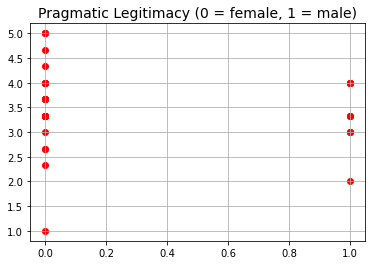

In [11]:
plt.scatter(df[34], df['prag_leg'], color='red')
plt.title('Pragmatic Legitimacy (0 = female, 1 = male)', fontsize=14)
# plt.xlabel('Interest Rate', fontsize=14)
# plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

## Cronbach's Alpha

In [12]:
def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [13]:
print("Cronbach's Alpha for Cognitive Legitimacy is: " + str(cronbach_alpha(df[[0,1,2]])))
print("Cronbach's Alpha for Pragmatic Legitimacy is: " + str(cronbach_alpha(df[[3,4,5]])))
print("Cronbach's Alpha for Gender Role Attitude is: " + str(cronbach_alpha(df[[16,17,18,19,20]])))

Cronbach's Alpha for Cognitive Legitimacy is: 0.7011558851077989
Cronbach's Alpha for Pragmatic Legitimacy is: 0.7575121734683142
Cronbach's Alpha for Gender Role Attitude is: 0.732003710527523


## Multiple Linear Regression

In [14]:
from sklearn import linear_model
import statsmodels.api as sm

In [15]:
#Define predictors
X = df[[34,"gender_role_att",26,31]]

Y = df["cog_leg"]
regression = linear_model.LinearRegression()
regression.fit(X,Y)
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print("Regression for Cognitive Legitimacy \n\n" + str(print_model)  + "\n")

Regression for Cognitive Legitimacy 

                            OLS Regression Results                            
Dep. Variable:                cog_leg   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     3.945
Date:                Fri, 02 Jul 2021   Prob (F-statistic):            0.00878
Time:                        12:19:58   Log-Likelihood:                -41.080
No. Observations:                  44   AIC:                             92.16
Df Residuals:                      39   BIC:                             101.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cons

In [16]:
#Define predictors
X = df[[34,"gender_role_att",26]]

Y = df["prag_leg"]
regression = linear_model.LinearRegression()
regression.fit(X,Y)
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print("Regression for Cognitive Legitimacy \n\n" + str(print_model)  + "\n")

Regression for Cognitive Legitimacy 

                            OLS Regression Results                            
Dep. Variable:               prag_leg   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.178
Date:                Fri, 02 Jul 2021   Prob (F-statistic):              0.106
Time:                        12:19:58   Log-Likelihood:                -45.990
No. Observations:                  44   AIC:                             99.98
Df Residuals:                      40   BIC:                             107.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
cons